In [2]:
import pandas as pd 
import numpy as np 


In [3]:
scraped=pd.read_csv('E:\\Machine_learning_projects\\fake_news_detection.csv')

In [4]:
scraped.head()

,link,published,text,title,site
0,http://edition.cnn.com/2020/08/19/uk/police-of...,2020-08-19T00:00:00,London (CNN) A British police officer needed t...,Police officer freed by firefighters after get...,cnn
1,http://edition.cnn.com/2020/08/21/business/bre...,2020-08-21T00:00:00,London (CNN Business) The latest round of trad...,UK-EU trade talks are going backward and time ...,cnn
2,http://edition.cnn.com/2019/11/21/us/2019-in-r...,2019-11-21T00:00:00,(CNN) Here is a look back at the events of 201...,2019 In Review Fast Facts,cnn
3,http://edition.cnn.com/2020/08/12/business/ben...,2020-08-12T00:00:00,"In a series of tweets Tuesday, the politically...",Ben & Jerry's takes on UK government's handlin...,cnn
4,http://edition.cnn.com/2020/08/21/entertainmen...,2020-08-21T00:00:00,London (CNN) Musician Taylor Swift has donated...,Taylor Swift donates to London student Vitoria...,cnn


In [5]:
is_true1=(scraped['site']=='cnn')
is_true2=(scraped['site']=='bbc')
is_true3=(scraped['site']=='washingtonpost')
is_false1=(scraped['site']=='breitbart')
is_false2=(scraped['site']=='infowars')


In [6]:
scraped.loc[is_true1,'label']='real'
scraped.loc[is_true2,'label']='real'
scraped.loc[is_true3,'label']='real'

In [7]:
scraped.loc[is_false1,'label']='fake'
scraped.loc[is_false2,'label']='fake'

In [8]:
scraped.columns

Index(['link', 'published', 'text', 'title', 'site', 'label'], dtype='object')

In [9]:
# fake news dataset
fake=pd.read_csv("E:\\Machine_learning_projects\\fake.csv")

In [10]:
fake.head()

,Unnamed: 0,link,published,site,text,title,class
0,0,http://ifyouonlynews.com/2019/03/20/,2019-03-20T00:00:00,Ifyouonlynews,"On Monday night, U.S. Congressmen took the now...","March 20, 2019 – IFyouOnlyNews",fake
1,1,http://ifyouonlynews.com/2016/06/20/,2016-06-20T00:00:00,Ifyouonlynews,Dallas Mayor Mike Rawlings (D) stood next to T...,"June 20, 2016 – IFyouOnlyNews",fake
2,2,http://ifyouonlynews.com/2016/03/23/,2016-03-23T00:00:00,Ifyouonlynews,"Tomi Lahren, a host for OAN, took the stage at...","March 23, 2016 – IFyouOnlyNews",fake
3,3,http://ifyouonlynews.com/2016/03/20/,2016-03-20T00:00:00,Ifyouonlynews,If there is one thing you can say about Trump ...,"March 20, 2016 – IFyouOnlyNews",fake
4,4,https://nationalreport.net/trump-admin-to-dere...,2020-08-13T20:21:33+00:00,Nationalreport,"<Washington, DC>According to multiple inside s...",Trump Admin to Deregulate Pressure of Golden S...,fake


In [11]:
fake.shape

(635, 7)

In [12]:
fake.columns

Index(['Unnamed: 0', 'link', 'published', 'site', 'text', 'title', 'class'], dtype='object')

In [13]:
fake.rename(columns={'class':'label'},inplace=True)

In [14]:
fake['label'].head()

0    fake
1    fake
2    fake
3    fake
4    fake
Name: label, dtype: object

In [15]:
real=pd.read_csv("E:\\Machine_learning_projects\\real.csv")

In [16]:
real.head()

,Unnamed: 0,link,published,site,text,title,class
0,0,http://edition.cnn.com/2020/09/04/entertainmen...,2020-09-04T00:00:00,cnn,"(CNN) Disney's live-action remake of ""Mulan"" i...",Pro-democracy activists are again calling on p...,real
1,1,http://edition.cnn.com/2020/09/08/asia/china-i...,2020-09-08T00:00:00,cnn,New Delhi (CNN) China and India have accused e...,China and India accuse each other of firing sh...,real
2,2,http://edition.cnn.com/2020/09/08/asia/us-mari...,2020-09-08T00:00:00,cnn,(CNN) A United States Marine convicted of kill...,US Marine pardoned by Philippines for killing ...,real
3,3,http://edition.cnn.com/2020/09/07/asia/hong-ko...,2020-09-07T00:00:00,cnn,Hong Kong (CNN) Police in Hong Kong have come ...,Hong Kong protests: Hong Kong police criticize...,real
4,4,http://edition.cnn.com/2020/09/07/asia/india-c...,2020-09-07T00:00:00,cnn,(CNN) The Indian military has alerted China to...,India alerts China amid reports of 'abduction'...,real


In [17]:
real.rename(columns={'class':'label'},inplace=True)

In [18]:
real.columns

Index(['Unnamed: 0', 'link', 'published', 'site', 'text', 'title', 'label'], dtype='object')

## Concatenating data frames


In [19]:
data=pd.concat([scraped,fake,real],sort=False).reset_index(drop=True)

In [20]:
#shuffling data'
from sklearn.utils import shuffle
data=shuffle(data)
data=data.reset_index(drop=True)

## Cleaning data

In [21]:
data.label.head()

0    real
1    real
2    real
3    fake
4    real
Name: label, dtype: object

In [22]:
dd=data["title"].duplicated() 

In [23]:
final_data=data[~dd]

In [24]:
final_data.shape

(2689, 7)

In [25]:
final_data.label.unique()

array(['real', 'fake'], dtype=object)

In [26]:
final_data.columns


Index(['link', 'published', 'text', 'title', 'site', 'label', 'Unnamed: 0'], dtype='object')

In [27]:
final_data=data.drop(['link','site','published','Unnamed: 0'],axis=1)

In [28]:
final_data.columns

Index(['text', 'title', 'label'], dtype='object')

In [29]:
final_data.head()

,text,title,label
0,Cape Town (CNN Business) When a South African ...,Mami Wata: The surf brand changing the percept...,real
1,Get breaking news alerts and special reports. ...,'Biggest bang since the Big Bang': Scientists ...,real
2,(CNN) Muscles aching after an afternoon gym se...,Tayla Harris: 'I would be happy to go through ...,real
3,Buffalo Sector Border Patrol agents arrested s...,Previous Deportees Arrested in New York After ...,fake
4,(CNN) UK school students will now receive the ...,UK government makes dramatic exam results U-tu...,real


In [30]:
final_data=final_data.dropna()

In [31]:
#convert the text to lowercase
final_data['text']=final_data['text'].apply(lambda x:x.lower())

In [32]:
#remove punctuation
import string 

def punctuation_removal(text):
    all_list=[char for char in text if char not in string.punctuation]
    clean_str=''.join(all_list)
    return clean_str
final_data['text']=final_data['text'].apply(punctuation_removal)

In [33]:
final_data['text'].head()

0    cape town cnn business when a south african su...
1    get breaking news alerts and special reports t...
2    cnn muscles aching after an afternoon gym sess...
3    buffalo sector border patrol agents arrested s...
4    cnn uk school students will now receive the gr...
Name: text, dtype: object

## Remove stop word

In [34]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

final_data['text'] = final_data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to C:\Users\CRIZMA MEGA
[nltk_data]     STORE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
final_data.head()

,text,title,label
0,cape town cnn business south african surf comp...,Mami Wata: The surf brand changing the percept...,real
1,get breaking news alerts special reports news ...,'Biggest bang since the Big Bang': Scientists ...,real
2,cnn muscles aching afternoon gym session tayla...,Tayla Harris: 'I would be happy to go through ...,real
3,buffalo sector border patrol agents arrested s...,Previous Deportees Arrested in New York After ...,fake
4,cnn uk school students receive grades teachers...,UK government makes dramatic exam results U-tu...,real


## Exploring and Visualizing data 

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

label
fake    1477
real    1703
Name: text, dtype: int64


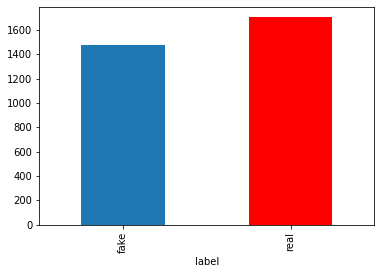

In [37]:
#how many fake and real articles

print(final_data.groupby(['label'])['text'].count())
final_data.groupby(['label'])['text'].count().plot(kind="bar",color={'red','C0'})
plt.show()

#visualizing data using word cloud 
## What is the word cloud 
It's an image composed of words used in a particular text subject in which the size of each word indicates its frequency ot importance

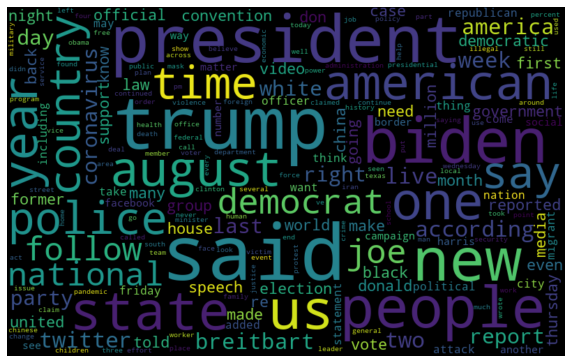

In [38]:
#for fake news
from wordcloud import WordCloud

fake_data=final_data[final_data['label']=='fake']
all_words=' '.join([text for text in fake_data.text])

wordcloud=WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

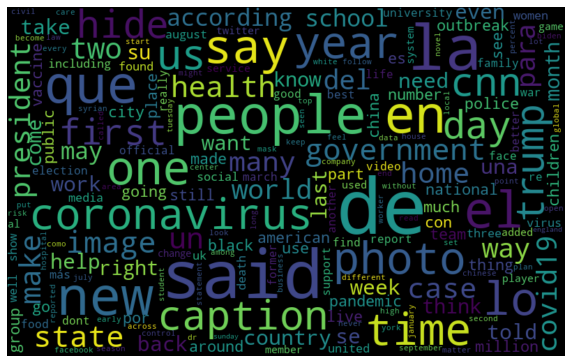

In [39]:
#for real news
from wordcloud import WordCloud

real_data=final_data[final_data['label']=='real']
all_words=' '.join([text for text in real_data.text])

wordcloud=WordCloud(width=800,height=500,max_font_size=110,collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Most frequent words in fake news

## 1-By using tokenization :
splitting up a large body of text into smaller lines,words even creating  for a non-English language. The various tokenization functions in-built into the nltk module itself)
## 2-By using nltk.FreqDist():
FreqDist which gives you the frequency of words within a text

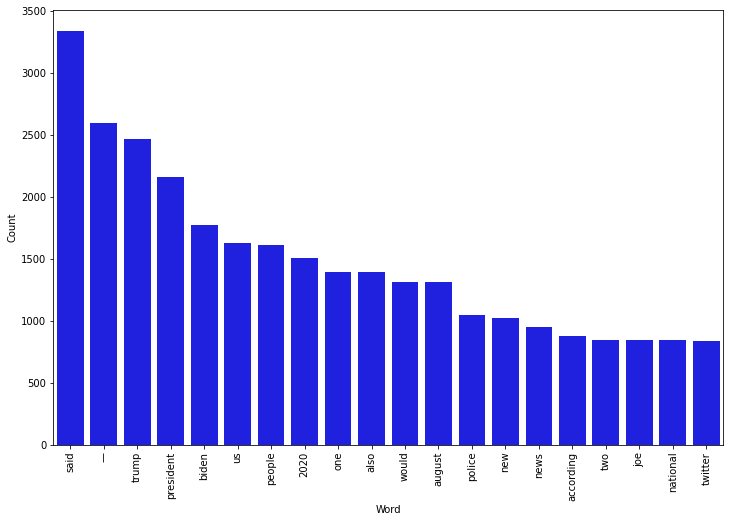

In [40]:
from nltk import tokenize

#Tokenize a string on whitespace (space, tab, newline)
token_space=tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                "Frequency": list(frequency.values())})
    #using nlargest() to get the word with most high frequency 
    # n is the number of value to select
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

counter(final_data[final_data['label'] == 'fake'], 'text', 20)

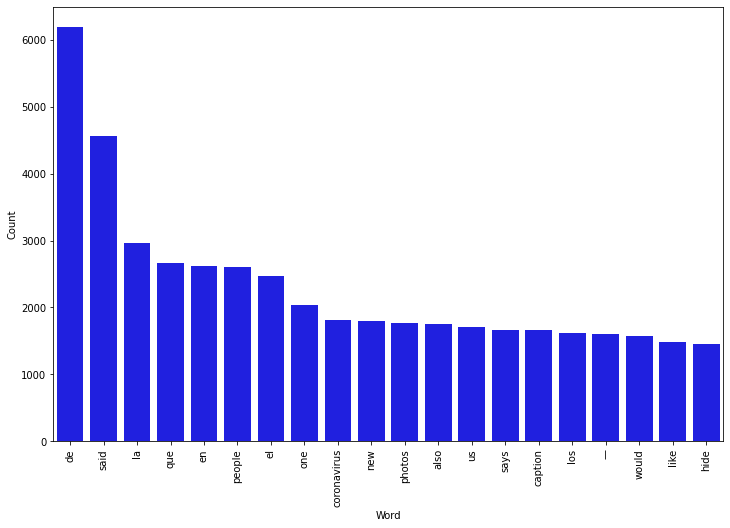

In [41]:
#for real data
counter(final_data[final_data['label'] == 'real'], 'text', 20)

## Modeling
 the modeling process will consist of vectorizing the corpus stored in "text" column ,then applying TF-IDF and finally a classification machine learning 
 
## Vectorizing
You will first have to create a CountVectorizer to count the number of words (term frequency), limit your vocabulary size, apply stop words and etc

## TF-IDF
TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

IDF (Inverse Document Frequency): Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
#spliting the data 
X_train,X_test,y_train,y_test=train_test_split(final_data['text'],final_data.label,test_size=0.2,random_state=42)

In [44]:
y_train.head()

3138    fake
3174    real
557     real
2628    real
2706    real
Name: label, dtype: object

we are gonna use different algorithms for classification

## Logistic regression 

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy: 87.58%


In [47]:
prediction[0:6]

array(['fake', 'fake', 'fake', 'real', 'real', 'real'], dtype=object)

In [48]:
#The confusion matrix:
cm=confusion_matrix(y_test,prediction)
cm

array([[257,  38],
       [ 41, 300]], dtype=int64)

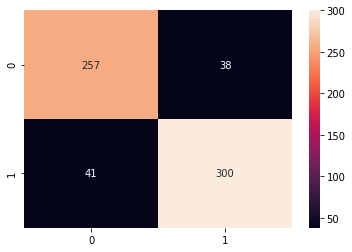

In [49]:
sns.heatmap(cm,annot=True,fmt="d")

## using descicion tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])

# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 87.26%


In [52]:
#The confusion matrix:
cm=confusion_matrix(y_test,prediction)
cm

array([[256,  39],
       [ 42, 299]], dtype=int64)

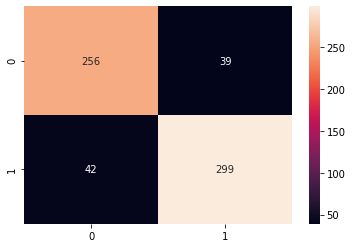

In [53]:
sns.heatmap(cm,annot=True,fmt="d")

## Using Randomforest

In [54]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 87.89%


In [56]:
#The confusion matrix:
cm=confusion_matrix(y_test,prediction)
cm

array([[280,  15],
       [ 62, 279]], dtype=int64)

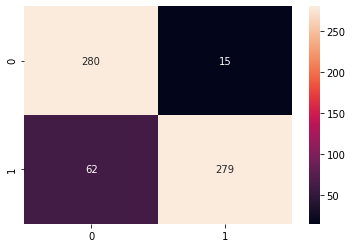

In [57]:
sns.heatmap(cm,annot=True,fmt="d")

## Using Naive Bayes:

## What is Naive Bayes algorithm?

It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:

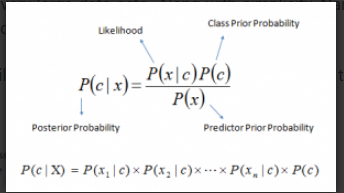

P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
P(c) is the prior probability of class.
P(x|c) is the likelihood which is the probability of predictor given class.
P(x) is the prior probability of predictor.
 

In [58]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('to_dense',FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
                 ('model', GaussianNB())])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

E:\anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
E:\anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:97: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


accuracy: 82.39%
